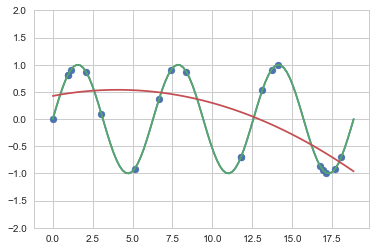

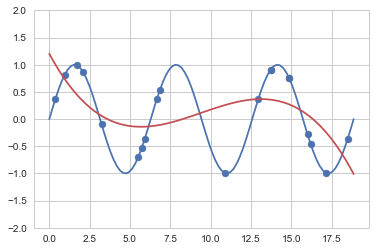

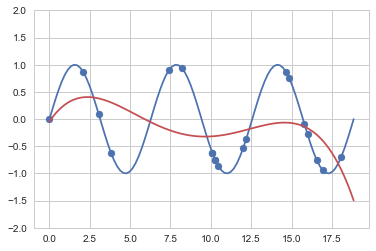

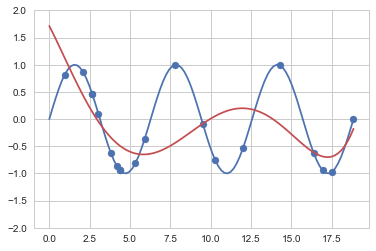

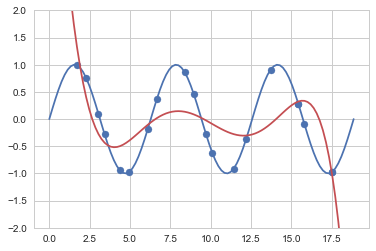

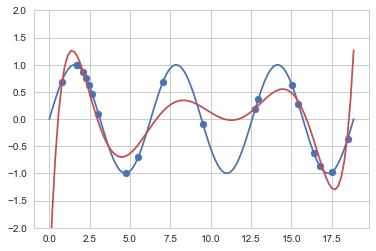

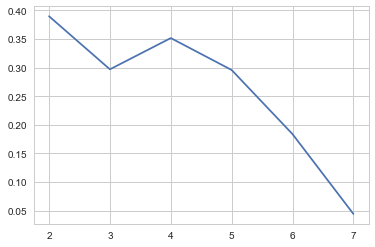

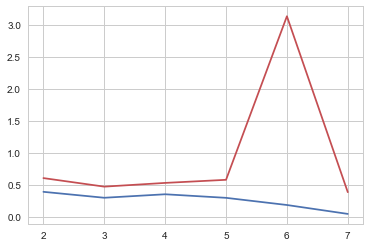

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 100
X = np.linspace(0, 6*np.pi, N)
Y = np.sin(X)

plt.plot(X, Y)

def make_poly(X, deg):
    n = len(X)
    data = [np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
    return np.vstack(data).T

def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))

def fit_and_display(X, Y, sample, deg):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    test_idx = [i for i in range(len(X)) if i not in train_idx]
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[test_idx]
    Ytest = Y[test_idx]
    
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit(Xtrain_poly, Ytrain)
    
    Xtest_poly = make_poly(Xtest, deg)
    
    X_poly = make_poly(X, deg)
    Yhat = X_poly.dot(w)
    
    
    
    plt.scatter(Xtrain, Ytrain)
    plt.plot(X, Y)
    plt.plot(X, Yhat, c='r')
    plt.ylim((-2, 2))
    plt.show()
    return get_mse(Ytrain, Xtrain_poly.dot(w)), get_mse(Ytest, Xtest_poly.dot(w))
    
degs = [i for i in range(2, 8)]
train_mses = []
test_mses = []
for deg in degs:
    train_mse, test_mse = fit_and_display(X, Y, 20, deg)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
def get_mse(Y, Yhat):
    return (Y-Yhat).T.dot(Y-Yhat) / len(Y)

plt.plot(degs, train_mses, c='b')
plt.show()
plt.plot(degs, train_mses, c='b')
plt.plot(degs, test_mses, c='r')
plt.show()
    